## Toolbox Loading

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb
from xgboost import *

#Model evaluation
from sklearn.metrics import *

#Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv(r'C:\Users\USER1\Desktop\aug_train.csv')

In [3]:
test_df = pd.read_csv(r'C:\Users\USER1\Desktop\aug_test.csv')

## Data Exploration

In [4]:
train_df.shape

(19158, 14)

In [5]:
test_df.shape

(2129, 13)

In [6]:
train_df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [7]:
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [8]:
train_df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [9]:
#information of training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [10]:
#statistical description of training dataset
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [11]:
#statistical description of object type in training dataset
train_df.describe(include='object').T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


## Data Cleaning

In [12]:
train_df = train_df.drop(columns=['city','enrollee_id'],axis=1)

In [13]:
#checking for null values in dataset
train_df.isnull().sum().sort_values(ascending=False).head(20)

company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64

In [14]:
#replacing incorrect variable
train_df['company_size'] = train_df['company_size'].replace('10/49',np.nan)

In [15]:
#percentage of null values in total training dataset
percent_of_missing_df = ((test_df.isnull().sum() / test_df.isnull().count())*100).sort_values(ascending = False).head(20)
percent_of_missing_df

company_type              29.779239
company_size              29.215594
gender                    23.860968
major_discipline          14.654767
education_level            2.442461
last_new_job               1.878816
enrolled_university        1.456083
experience                 0.234852
enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
relevent_experience        0.000000
training_hours             0.000000
dtype: float64

In [16]:
#checking for unique values in training dataset
train_df.nunique().head(20).sort_values(ascending=True)

relevent_experience         2
target                      2
gender                      3
enrolled_university         3
education_level             5
major_discipline            6
company_type                6
last_new_job                6
company_size                7
experience                 22
city_development_index     93
training_hours            241
dtype: int64

In [17]:
#categorical features in training dataset
categorical_features = train_df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

In [18]:
#numerical features in training dataset
numeric_features = train_df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['city_development_index', 'training_hours', 'target'], dtype='object')

In [19]:
#filling null values in training dataset
for col in categorical_features:
    train_df[col].fillna(train_df[col].value_counts().index[0], inplace = True)

In [20]:
#checking for sum of null values in dataset
train_df.isnull().sum().sum()

0

## Exploratory Data Analysis

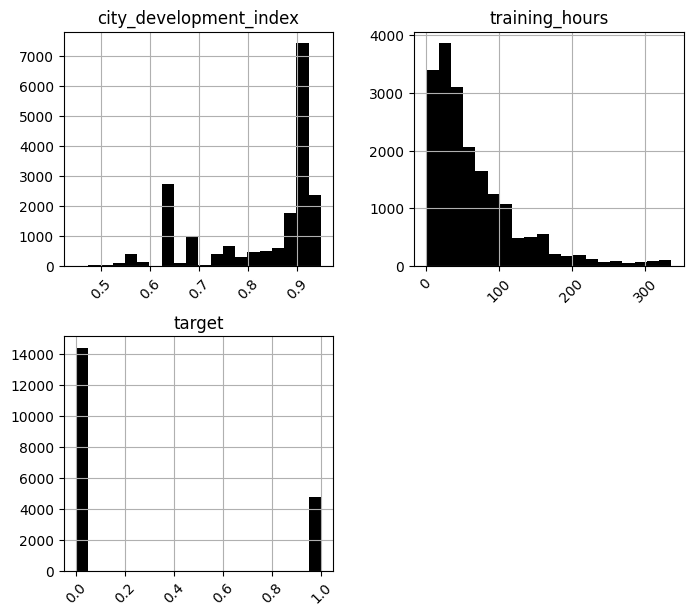

In [21]:
#histogram of numeric features in training dataset
train_df.hist(figsize=(8,7), xrot=45,color = 'k',bins =20)
plt.show()

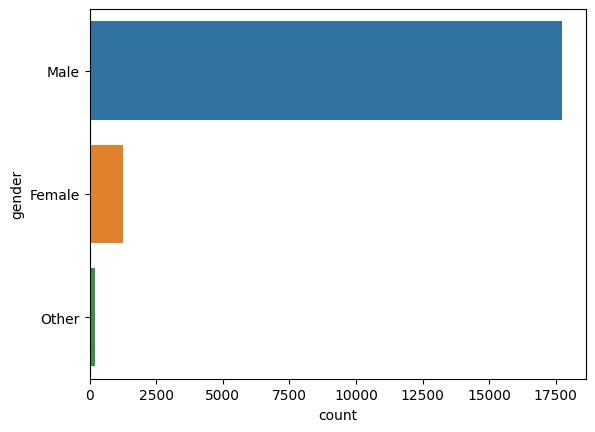

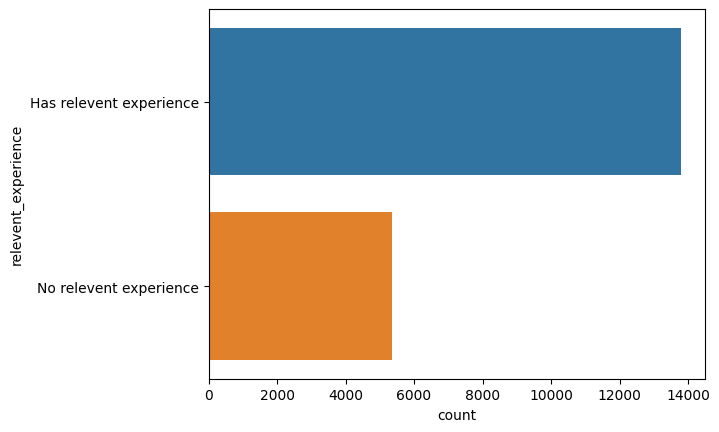

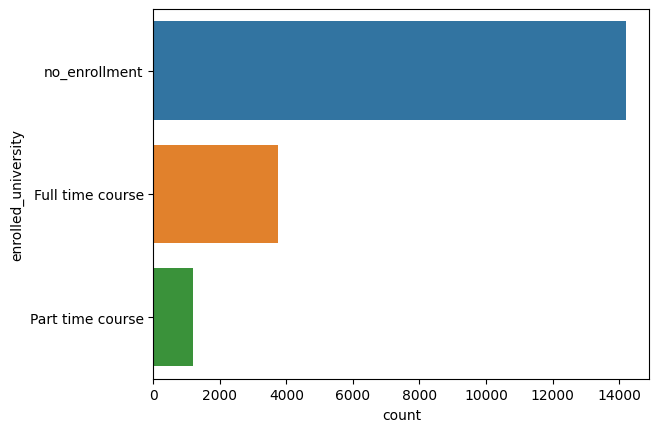

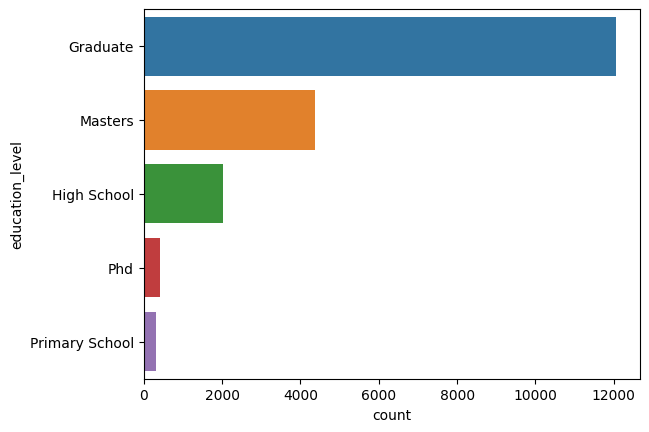

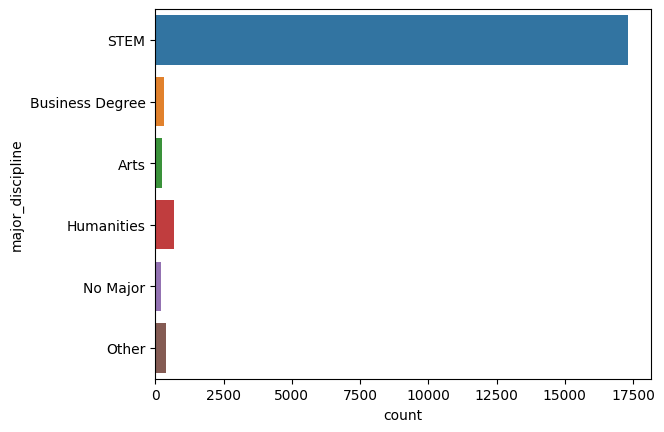

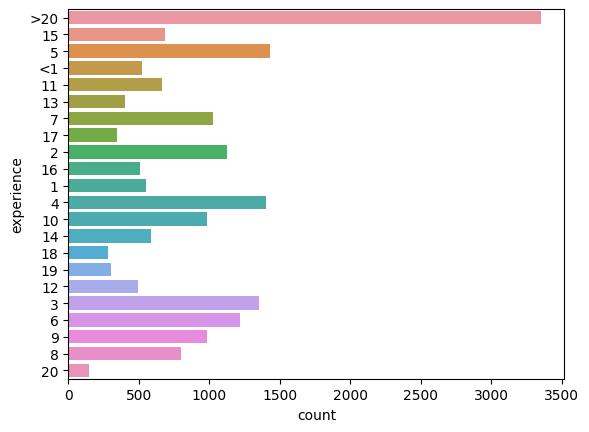

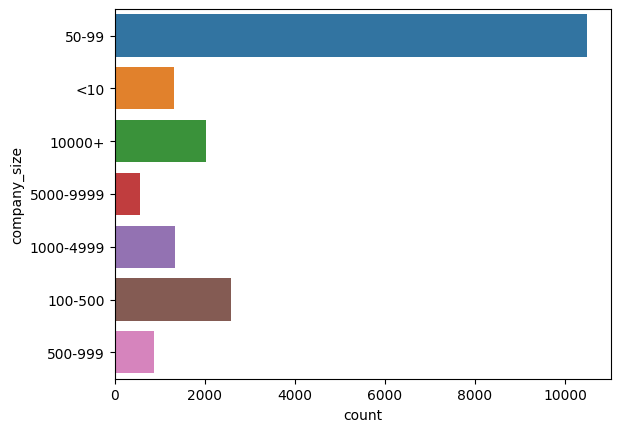

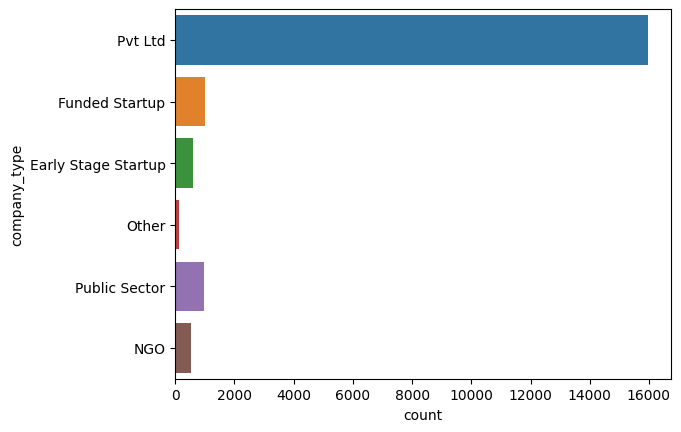

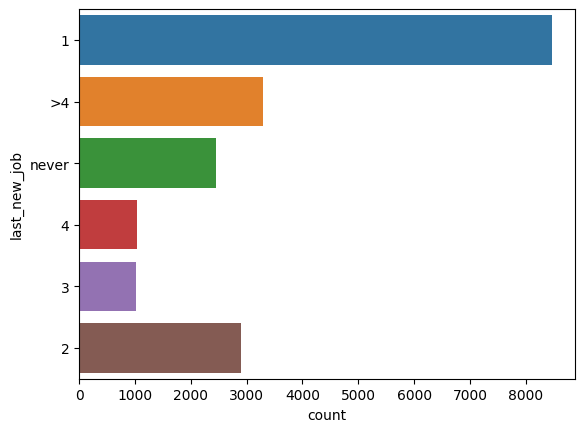

In [22]:
#countplot of categorical features in training dataset
for col in categorical_features:
    sns.countplot(y=col,data = train_df)
    plt.show()

## Feature Engineering

In [23]:
#counting values in target variable
chart = train_df['target'].value_counts()
chart

0.0    14381
1.0     4777
Name: target, dtype: int64

<AxesSubplot:>

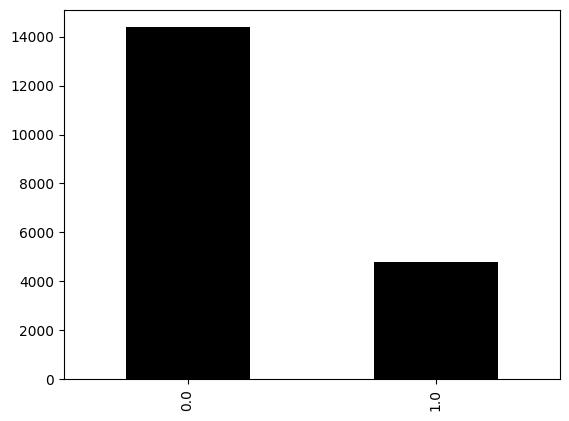

In [24]:
#showing value counts of target
chart.plot(kind='bar', color = 'k')

In [25]:
#encoding categorical features
labelencoder = LabelEncoder()
to_encode = train_df[['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job']]
train_df_temp = to_encode.astype('str').apply(labelencoder.fit_transform)
train_df_final = train_df_temp.where(~to_encode.isna(),to_encode)
train_df.drop(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],axis=1,inplace=True)
encoded_data = train_df.join(train_df_final)

In [26]:
#shape of encoded data
encoded_data.shape

(19158, 12)

<AxesSubplot:>

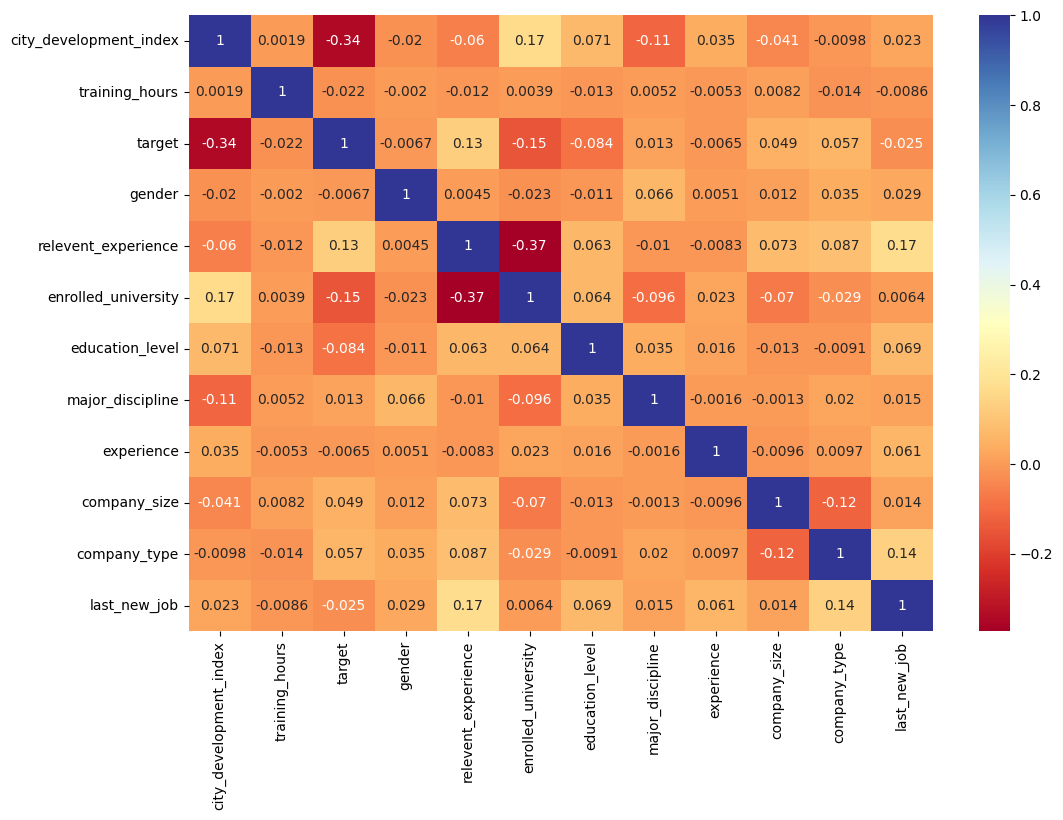

In [27]:
#heatma of correlations in dataset
plt.figure(figsize = (12,8))
sns.heatmap(encoded_data.corr(), annot=True,cmap='RdYlBu')

In [28]:
# Defining the target & predictor variables
X = encoded_data.drop(columns=["target"])
y = encoded_data["target"]

# Splitting the dataframe into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 1)

In [29]:
# Putting the training dataset together for further splitting and modelling
train_data = X_train.join(y_train, on=X_train.index)
train_data.shape

(15326, 12)

In [30]:
# Putting the training dataset together for future model evaluation
test_data = X_test.join(y_test, on=X_test.index)
test_data.shape

(3832, 12)

In [31]:
# Defining the target & predictor variables
X = train_data.drop(columns=["target"])
y = train_data["target"]

In [32]:
# Resampling the dataframe using SMOTE
smote = SMOTE(sampling_strategy="auto")
X, y = smote.fit_resample(X, y)
y.value_counts()

0.0    11497
1.0    11497
Name: target, dtype: int64

In [33]:
# Splitting the resampled dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
y_train.value_counts()

0.0    8655
1.0    8590
Name: target, dtype: int64

In [34]:
#scalinng test data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling

In [35]:
# Instantiate the models
log_reg_model = LogisticRegression(random_state=1)
dt_model = DecisionTreeClassifier(random_state=1)
rf_model = RandomForestClassifier(random_state=1)
knn_model = KNeighborsClassifier(n_neighbors = 5)
svm_model = SVC(random_state=1)
lgb_model = lgb.LGBMClassifier(random_state=1)
xgb_model = XGBClassifier(random_state=1)


In [36]:
# Create a dictionary of models
models = {
    "Logistic Regressor": log_reg_model,
    "Decision Tree Classifier": dt_model,
    "Random Forest Model": rf_model,
    "K Neighbor Nearest Algorithm": knn_model,
    "Support Vector Machine": svm_model,
    "LightGBM": lgb_model,
    "XGBoost": xgb_model
}

In [37]:
# Defining a helper function to fit models to data and score them
def classification_fit_and_score(models, X_train= X_train, X_test= X_test, 
                                 y_train= y_train, y_test= y_test):
    
    # List to collect the results
    results = []
    
    # Looping through the models to fit and score each
    for name, model in models.items():

        # fitting to the training data
        model.fit(X_train, y_train)

        # making predictions
        y_pred = model.predict(X_test)
        
        # Append model performance results
        results.append([
        name,
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        accuracy_score(y_test, y_pred)
        ])

        # Print Classification Report
        model_classification_report = classification_report(y_test, y_pred)
        print(f"{name} Model Classification Report", "\n", model_classification_report, "\n")
        
        #The Confusion Matrix of the Predictions
        cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
        cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
        sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
        plt.title("The Confusion Matrix of the Predictions", y = 1.05)
        plt.show()
        

        print("----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  -----", "\n") 
        print("----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  -----", "\n")
    
    # Put the results together
    eval_df = pd.DataFrame(results, columns=["model", "precision", "recall", "f1_score", "accuracy"])
    eval_df.set_index("model", inplace=True)
    eval_df.sort_values(by = ["f1_score", "accuracy", "recall"], ascending = False, inplace = True)

    return eval_df

Logistic Regressor Model Classification Report 
               precision    recall  f1-score   support

         0.0       0.70      0.75      0.72      2842
         1.0       0.74      0.68      0.71      2907

    accuracy                           0.71      5749
   macro avg       0.72      0.72      0.71      5749
weighted avg       0.72      0.71      0.71      5749
 



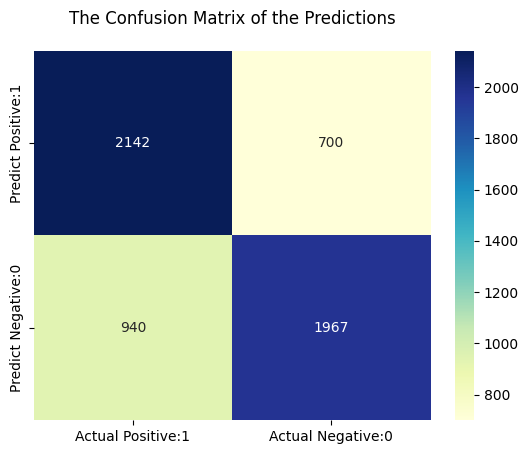

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Decision Tree Classifier Model Classification Report 
               precision    recall  f1-score   support

         0.0       0.75      0.74      0.74      2842
         1.0       0.75      0.76      0.75      2907

    accuracy                           0.75      5749
   macro avg       0.75      0.75      0.75      5749
weighted avg       0.75      0.75      0.75      5749
 



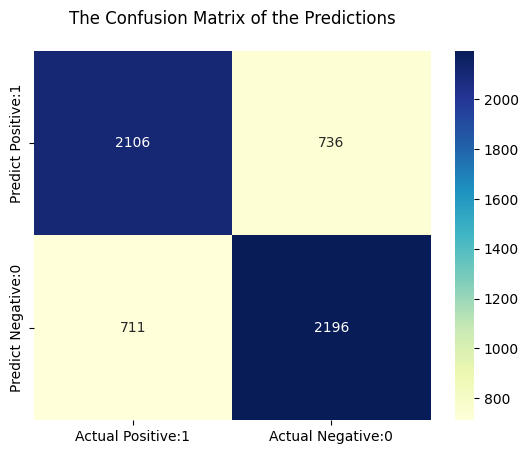

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Random Forest Model Model Classification Report 
               precision    recall  f1-score   support

         0.0       0.80      0.79      0.79      2842
         1.0       0.80      0.81      0.80      2907

    accuracy                           0.80      5749
   macro avg       0.80      0.80      0.80      5749
weighted avg       0.80      0.80      0.80      5749
 



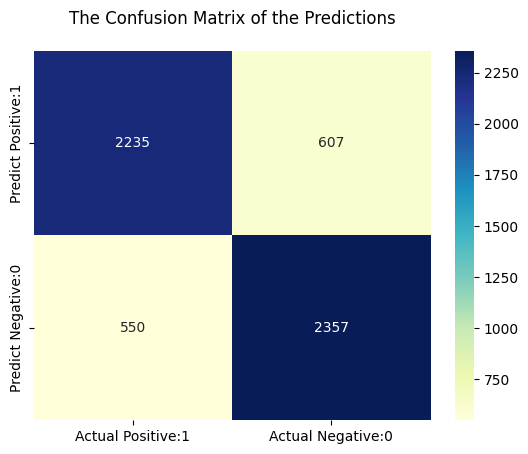

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

K Neighbor Nearest Algorithm Model Classification Report 
               precision    recall  f1-score   support

         0.0       0.74      0.70      0.72      2842
         1.0       0.72      0.76      0.74      2907

    accuracy                           0.73      5749
   macro avg       0.73      0.73      0.73      5749
weighted avg       0.73      0.73      0.73      5749
 



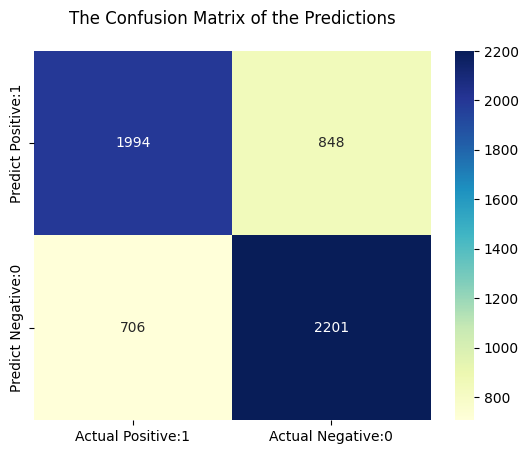

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

Support Vector Machine Model Classification Report 
               precision    recall  f1-score   support

         0.0       0.73      0.73      0.73      2842
         1.0       0.74      0.74      0.74      2907

    accuracy                           0.74      5749
   macro avg       0.74      0.74      0.74      5749
weighted avg       0.74      0.74      0.74      5749
 



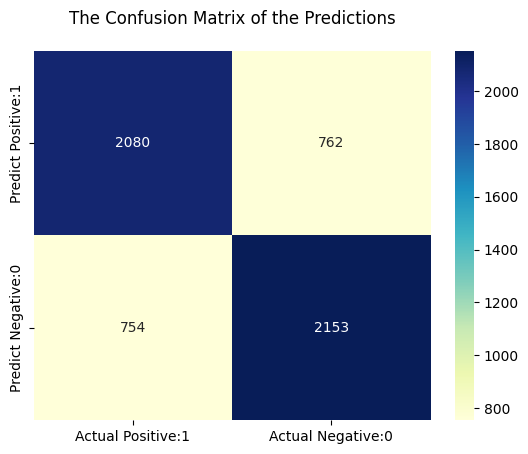

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

LightGBM Model Classification Report 
               precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      2842
         1.0       0.81      0.83      0.82      2907

    accuracy                           0.82      5749
   macro avg       0.82      0.82      0.82      5749
weighted avg       0.82      0.82      0.82      5749
 



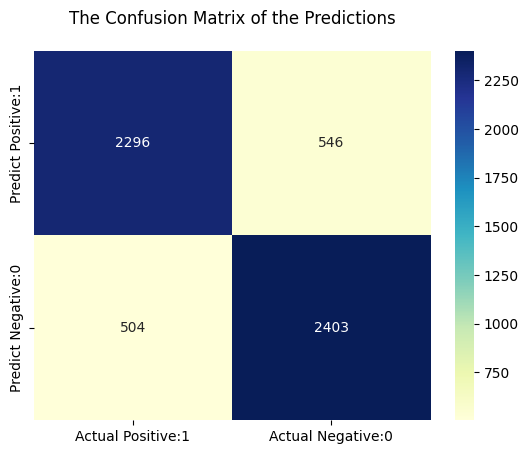

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

XGBoost Model Classification Report 
               precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      2842
         1.0       0.84      0.83      0.83      2907

    accuracy                           0.83      5749
   macro avg       0.83      0.83      0.83      5749
weighted avg       0.83      0.83      0.83      5749
 



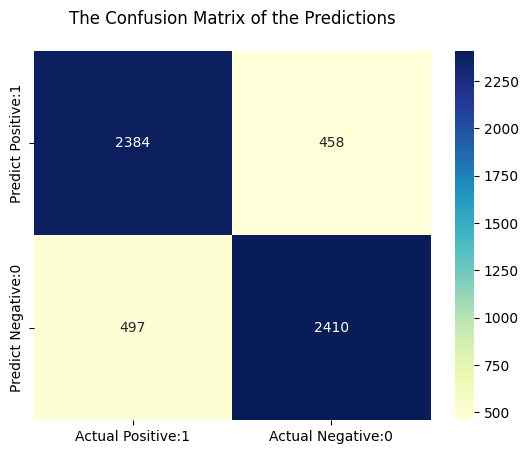

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 



,precision,recall,f1_score,accuracy
model,,,,
XGBoost,0.840307,0.829033,0.834632,0.833884
LightGBM,0.814852,0.826625,0.820697,0.817360
Random Forest Model,0.795209,0.810802,0.802930,0.798748
Decision Tree Classifier,0.748977,0.755418,0.752184,0.748304
Support Vector Machine,0.738593,0.740626,0.739608,0.736302
K Neighbor Nearest Algorithm,0.721876,0.757138,0.739087,0.729692
Logistic Regressor,0.737533,0.676643,0.705777,0.714733


In [38]:
model_performances = classification_fit_and_score(models)
model_performances

In [39]:
# Fit the top model to the training data
xgb_model = XGBClassifier(random_state=1)
xgb_model.fit(X_train, y_train)

# Create a dictionary of models
select_model = {
 "XGBoost": xgb_model
}


In [40]:
# Defining a helper function to evaluate the models at a go
def model_evaluation(fit_models, X_test, y_test):
    lst = []
    for name, model in fit_models.items():
        pred = model.predict(X_test)

        lst.append([
            name,
            precision_score(y_test, pred),
            recall_score(y_test, pred),
            f1_score(y_test, pred),
            accuracy_score(y_test, pred),
        ])

        # Feature importances
        importance = model.feature_importances_
        importance = pd.DataFrame(importance, columns=["score"]).reset_index()
        importance["Feature"] = list(X.columns)
        importance.drop(columns=["index"], inplace=True)
        importance.sort_values(by="score", ascending=False, ignore_index=True, inplace=True)

        # Plotting the feature importances
        fig = px.bar(importance, x="Feature", y="score")
        fig.show()
        print(f'Bar Chart of {name} feature importance')
        
        print("----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  -----", "\n") 
        print("----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  -----", "\n")

        eval_df = pd.DataFrame(lst, columns=["model", "precision", "recall", "f1_score", "accuracy"])
    eval_df.set_index("model", inplace=True)
    return eval_df

In [41]:
final_model_eval = model_evaluation(select_model, X_test, y_test)
final_model_eval

Bar Chart of XGBoost feature importance
----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 

----- ----- ----- ----- ----- ----- ----- ----- ----- -----  -----  ----- 



,precision,recall,f1_score,accuracy
model,,,,
XGBoost,0.840307,0.829033,0.834632,0.833884
